In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
# Download the data
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [3]:
# View the data
print("Number of columns: {}".format(train_data.shape[1]))
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print(train_labels[0:10])  # Display first 10 entries
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features
print(test_labels[0:10])  # Display first 10 entries

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

print("Sample: {}".format(train_labels[0:10]))

# Load into DataFrame
df = pd.DataFrame(train_data, columns=column_names)
df.head()

Number of columns: 13
Training set: (404, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
Testing set:  (102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]
Sample: [32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


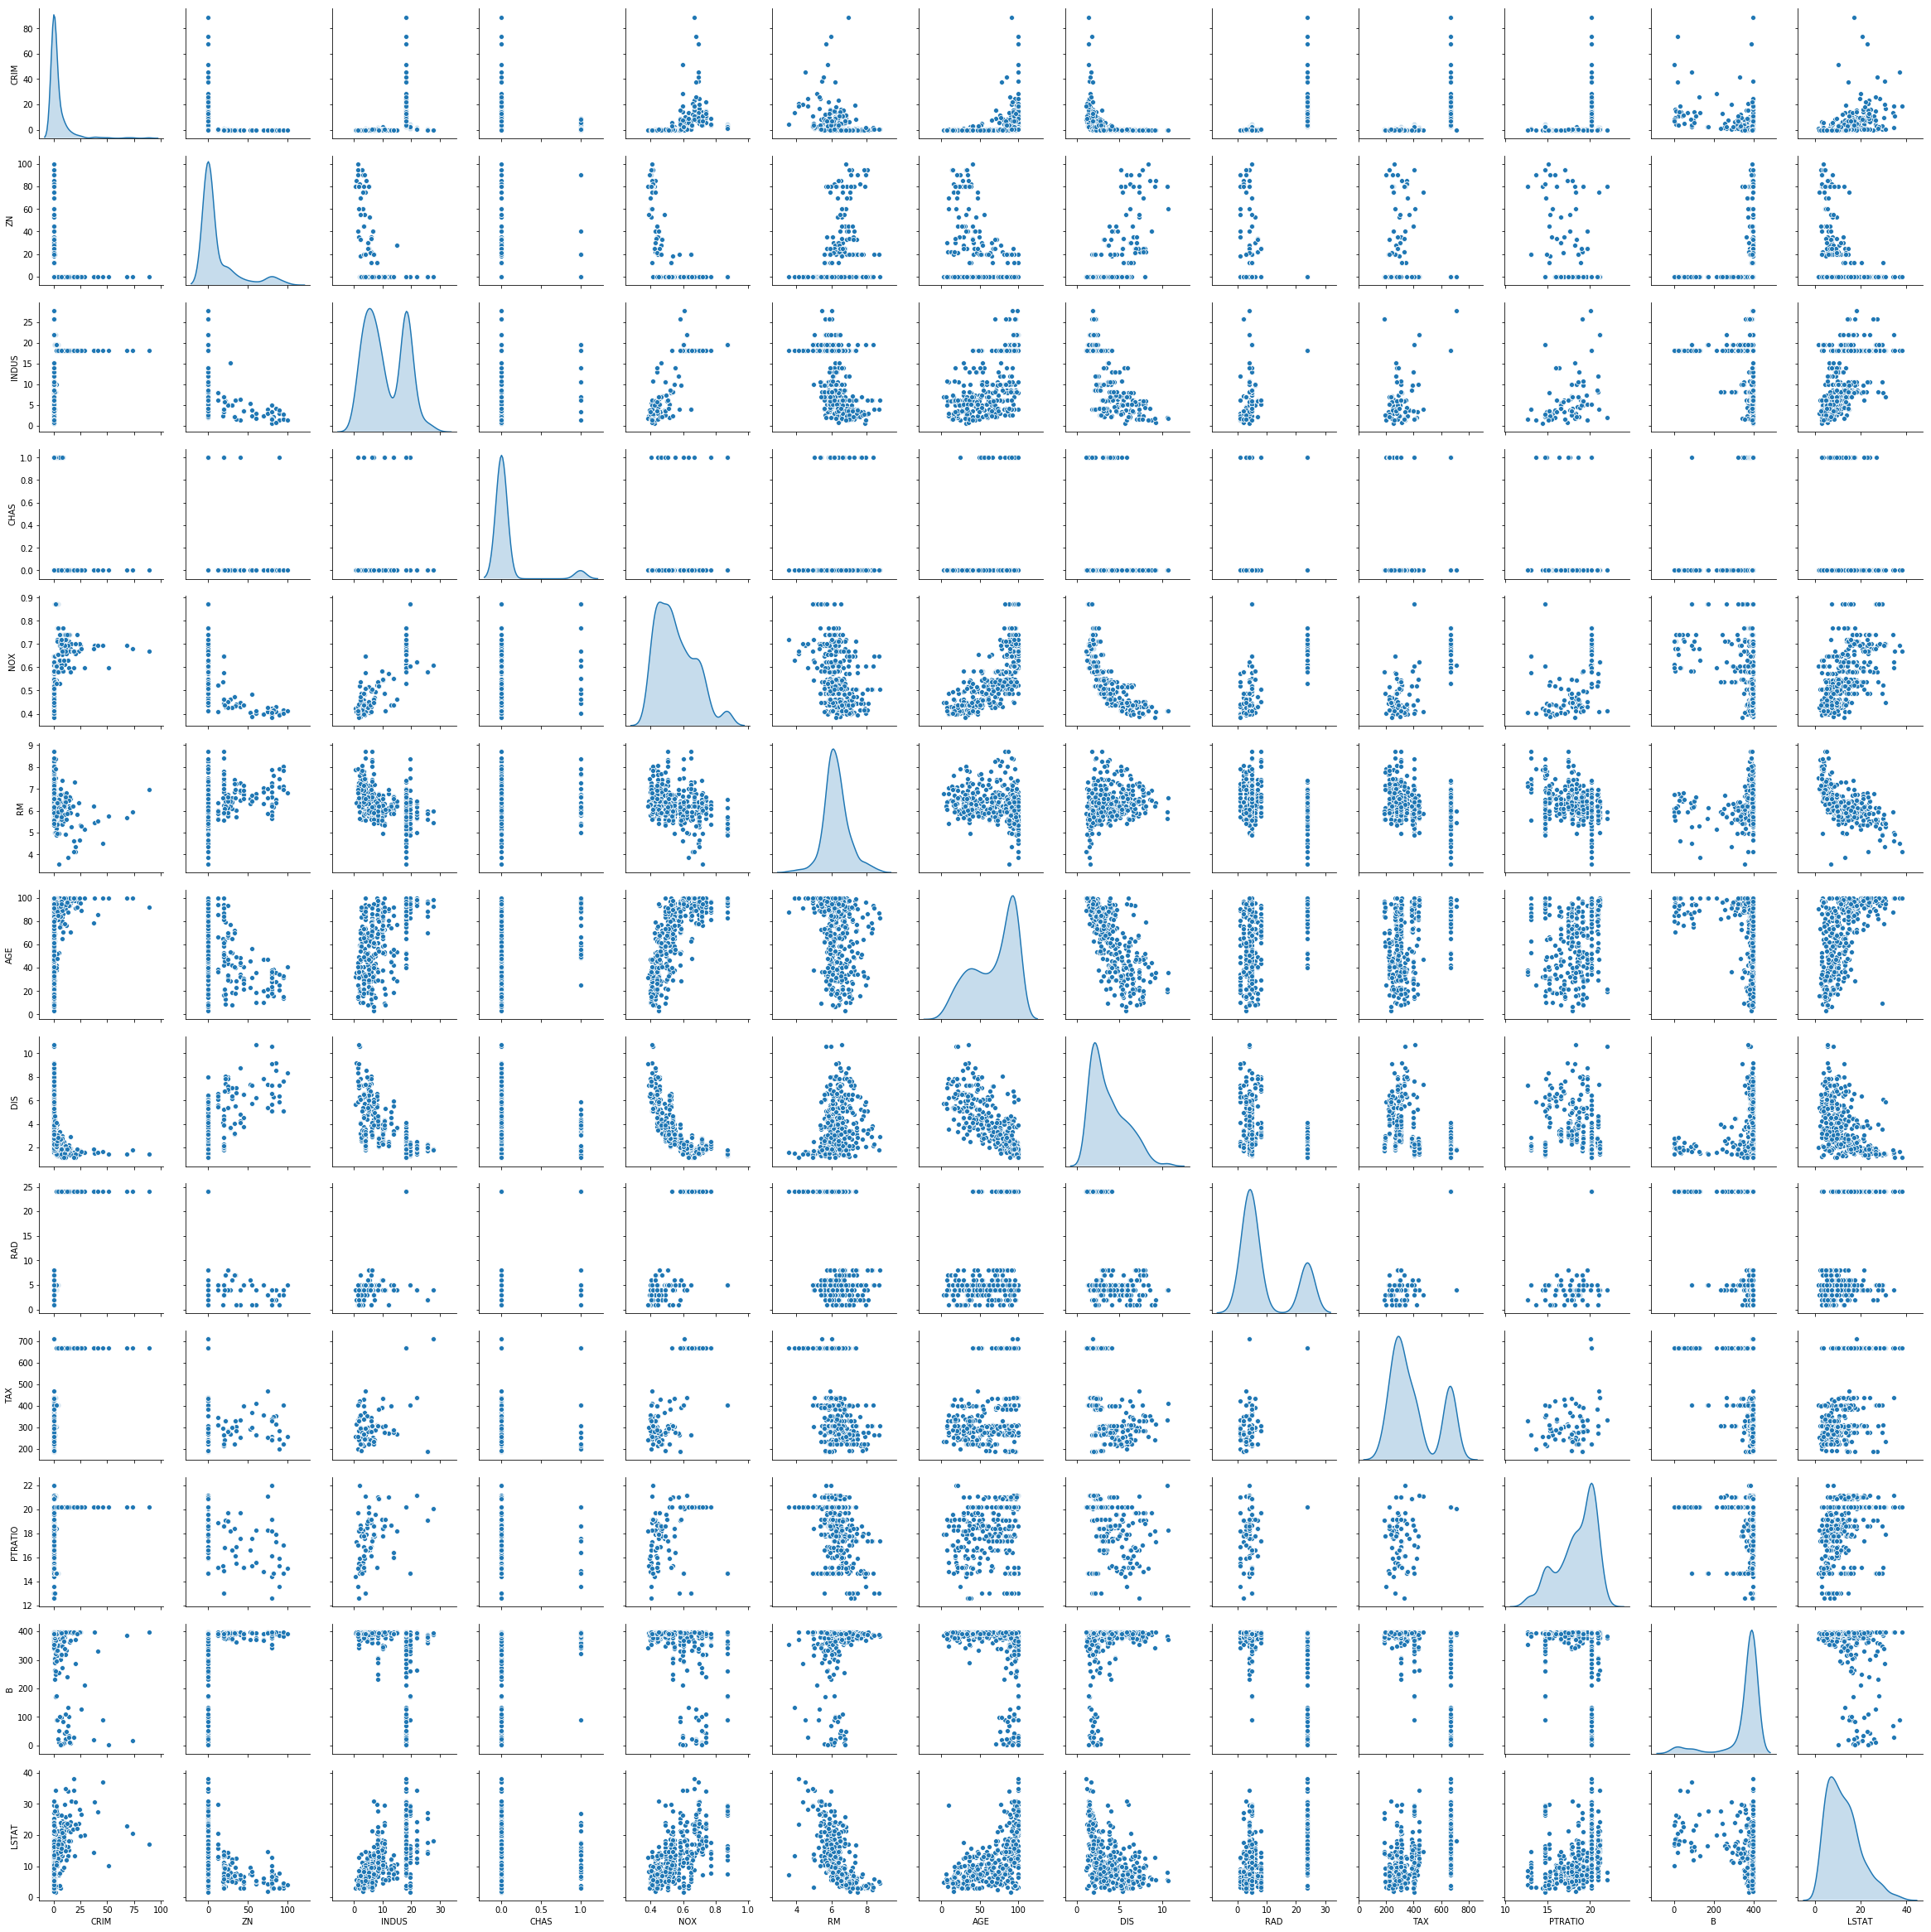

In [4]:
sns.pairplot(df[column_names], diag_kind="kde")
plt.show()

In [5]:
train_stats = df.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.745111,9.240734,0.00632,0.081437,0.26888,3.674808,88.9762
ZN,404.0,11.480198,23.767711,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,404.0,11.104431,6.811308,0.46000,5.130000,9.69000,18.100000,27.7400
CHAS,404.0,0.061881,0.241238,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.557356,0.117293,0.38500,0.453000,0.53800,0.631000,0.8710
RM,404.0,6.267082,0.709788,3.56100,5.874750,6.19850,6.609000,8.7250
AGE,404.0,69.010644,27.940665,2.90000,45.475000,78.50000,94.100000,100.0000
DIS,404.0,3.740271,2.030215,1.12960,2.077100,3.14230,5.118000,10.7103
RAD,404.0,9.440594,8.698360,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,404.0,405.898515,166.374543,188.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
# Normalize the data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data_norm = (train_data - mean) / std
test_data_norm = (test_data - mean) / std

In [7]:
# Build Model
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

optimizer = tf.train.RMSPropOptimizer(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train Model
EPOCHS = 1000
history = model.fit(train_data_norm, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0)

Instructions for updating:
Use tf.cast instead.


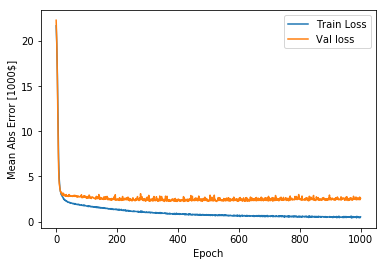

In [9]:
# Plot Training and Validation loss
def plot_history(history):
    fig1, ax1a = plt.subplots()
    ax1a.set_xlabel('Epoch')
    ax1a.set_ylabel('Mean Abs Error [1000$]')
    ax1a.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train Loss')
    ax1a.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label = 'Val loss')   
    ax1a.legend()
    
plot_history(history)

In [10]:
# Evaluate Model
[loss, mae] = model.evaluate(test_data_norm, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2585.07


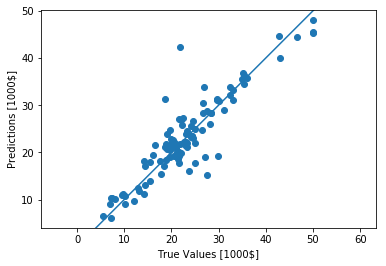

In [11]:
# Plot Actuals vs Predicted
test_predictions = model.predict(test_data_norm).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])

Text(0, 0.5, 'Count')

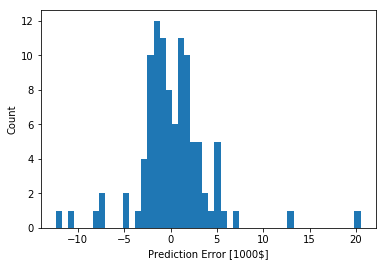

In [12]:
# Plot residuals
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
plt.ylabel("Count")